### Newman Exercise 9.5
The question asks us to use FTCS (Forward-Time Central-Space) method to solve the wave equation as follows 
\begin{equation}
\phi(x) = C\frac{x(L-x)}{L^2}\text{exp}[-\frac{(x-d)^2}{2\sigma^2}]
\end{equation}
which models a piano string being hit by a hammer.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Defining Constants
h = 10e-6  # time step
L = 1   # Length of wire in metres
v = 100 # velocity in m/s
d = 0.1 # distance of hammer
C = 1   # 1 m/s
sigma = 0.3  # sigma in metres
N = 100 # grid spacings
a = L/N

In [4]:
dt= dt= 0.01
iterations = int(dt/h)
displacement = np.zeros([iterations,N+1],float)
velocity = np.zeros([iterations,N+1],float)
x = np.linspace(0,L,N+1)
velocity[0,:] = C * x*(L-x)/L**2*np.exp( -1*(x-d)**2/(2*sigma**2))

In [5]:
for i in range(iterations-1): # time iteration
    for j in range(1,len(x)-1): # space iterations
        displacement[i+1,j] = displacement[i,j] +  h*velocity[i,j]
        velocity[i+1,j] = velocity[i,j] + \
        h*(v**2)/(a**2)*(displacement[i,j+1] + displacement[i,j-1] - 2*displacement[i,j])  

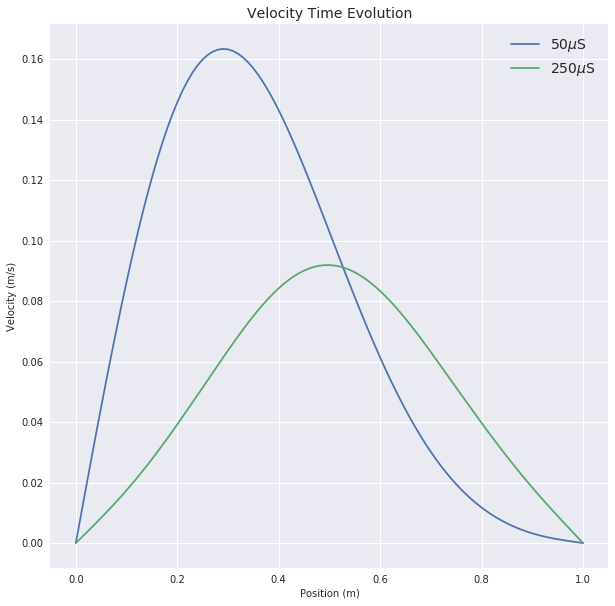

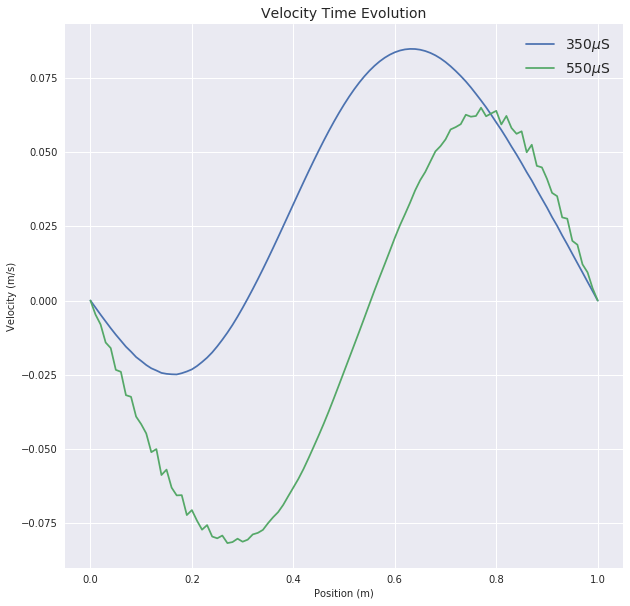

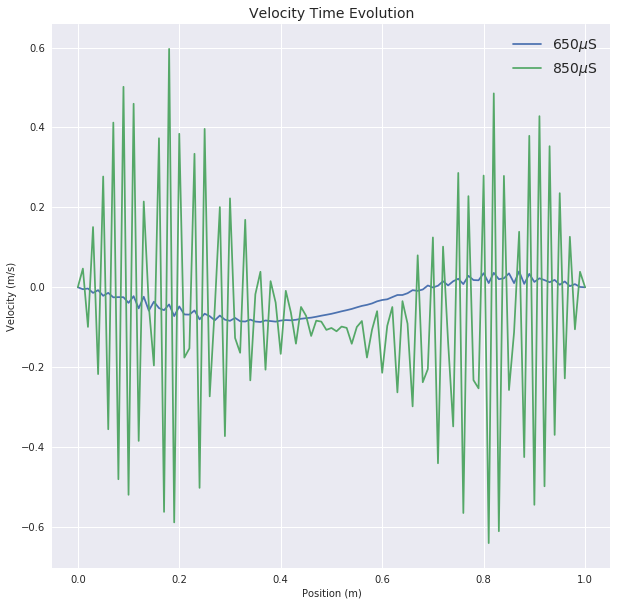

In [31]:
for i in range(3):
    plt.figure(figsize = (10,10))
    plt.title('Velocity Time Evolution', fontsize = 14)
    plt.xlabel('Position (m)', fontsize = 10)
    plt.ylabel('Velocity (m/s)',  fontsize = 10)
    plt.plot(x,velocity[50+300*i,:], label = np.str(50+300*i) + '$\mu$S')
    plt.plot(x,velocity[250+300*i,:], label = np.str(250+300*i) + '$\mu$S')
    plt.legend(fontsize = 14)
    plt.savefig('velocity'+np.str(i)+'.png')
    plt.show()

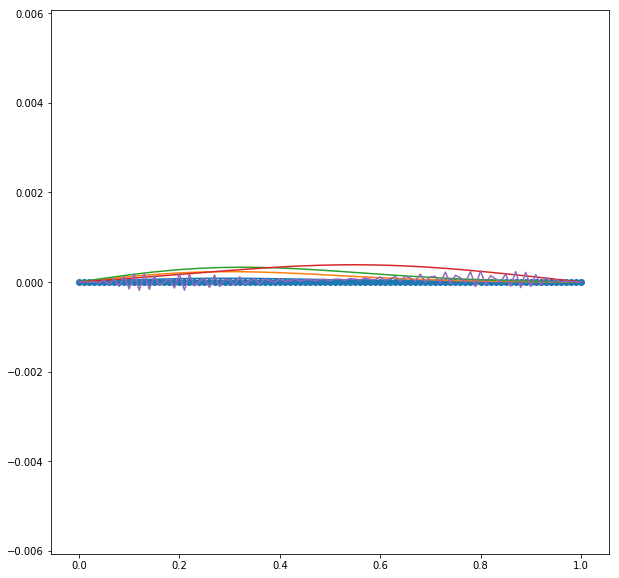

In [15]:
plt.figure(figsize = (10,10))
plt.scatter(x,displacement[0,:])
plt.plot(x,displacement[50,:])
plt.plot(x,displacement[150,:])
plt.plot(x,displacement[250,:])
plt.plot(x,displacement[550,:])
plt.plot(x,displacement[950,:])
plt.show()

### Part B Animations

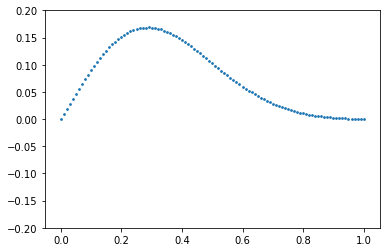

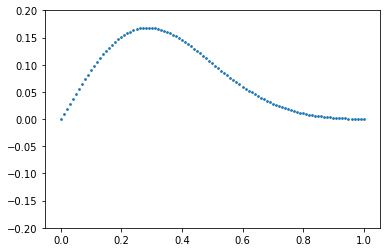

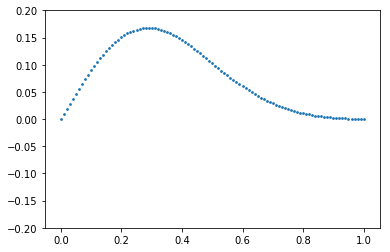

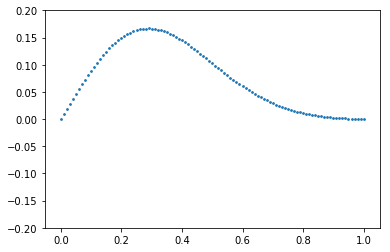

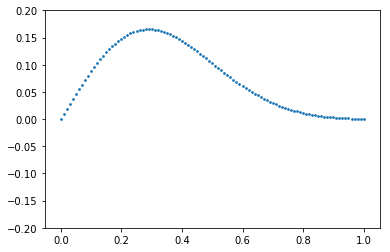

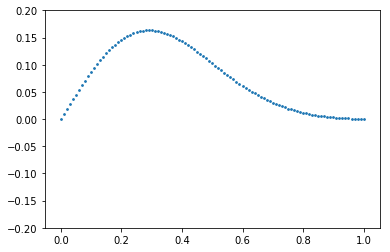

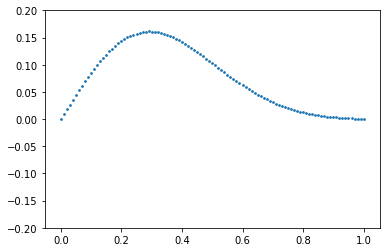

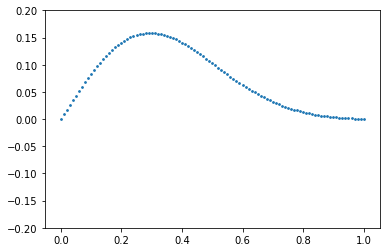

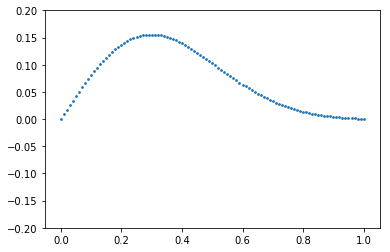

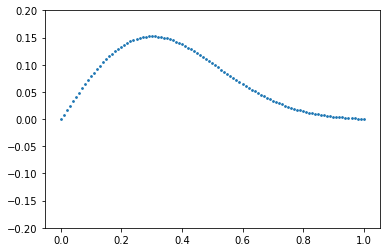

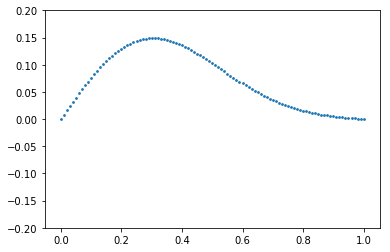

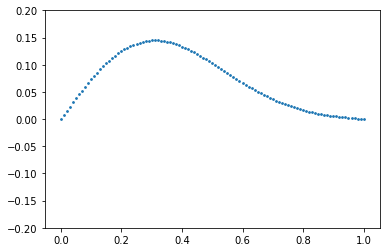

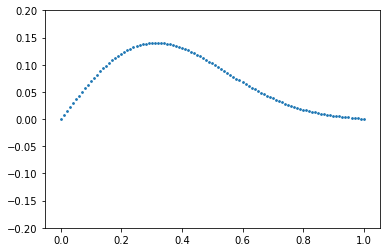

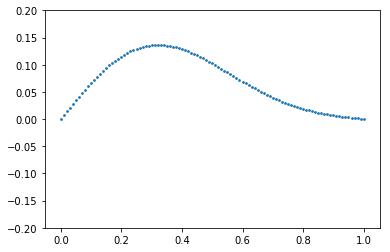

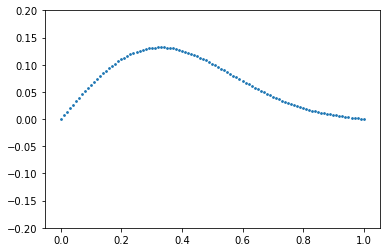

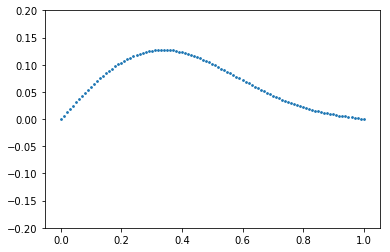

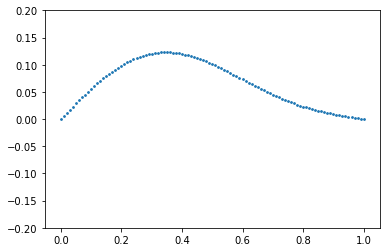

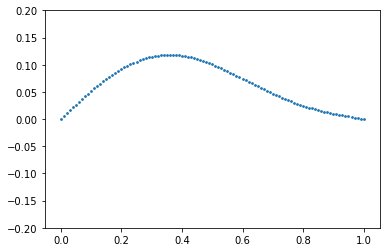

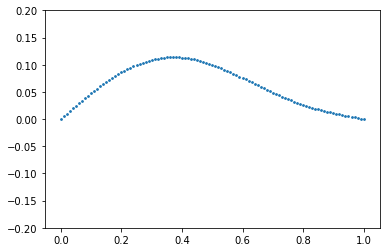

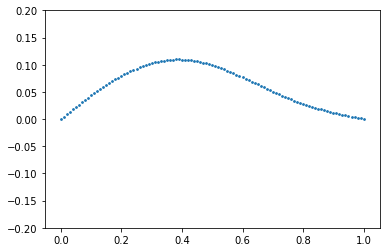

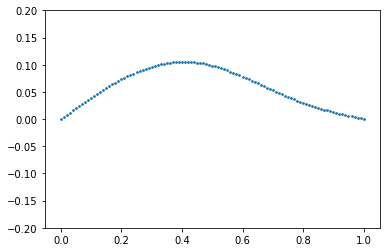

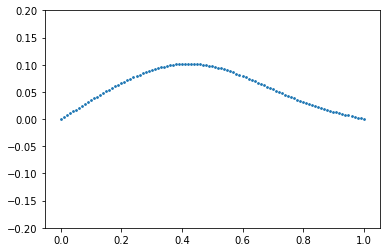

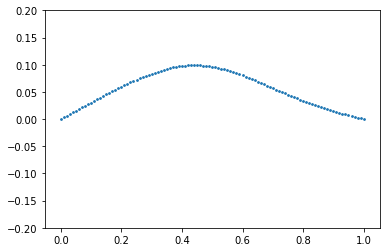

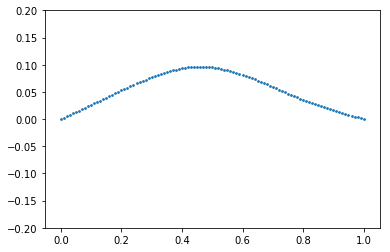

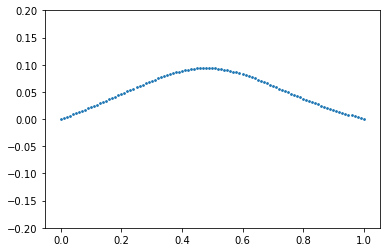

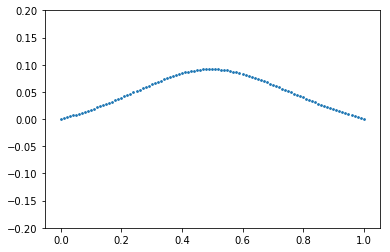

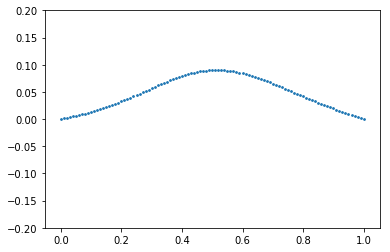

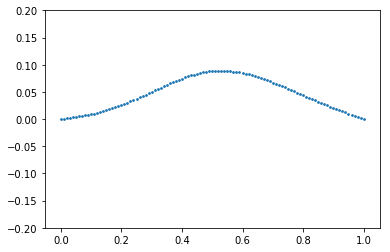

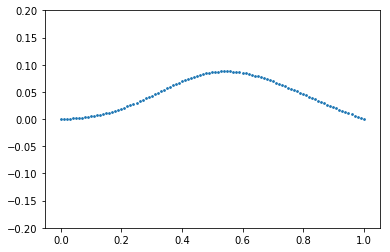

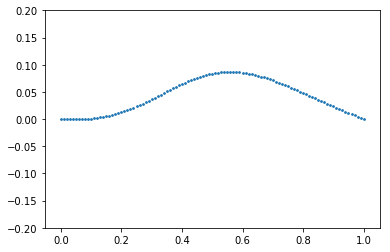

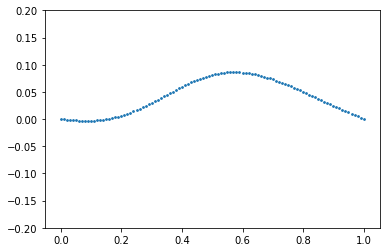

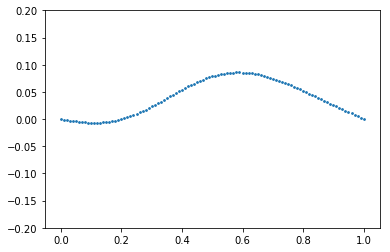

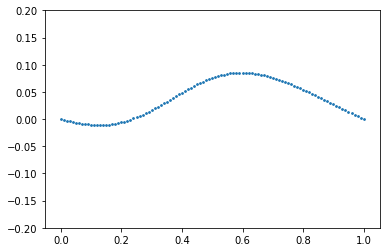

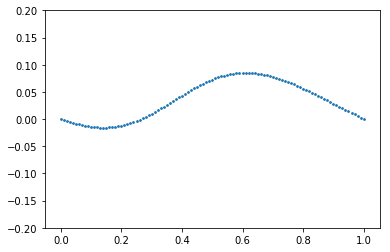

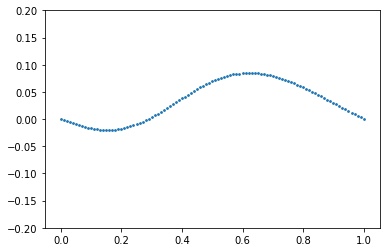

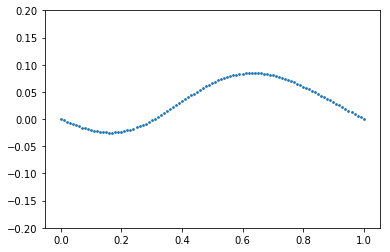

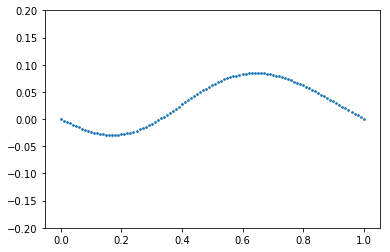

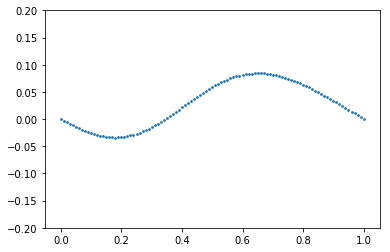

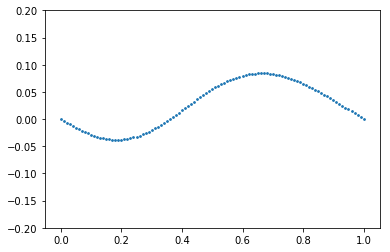

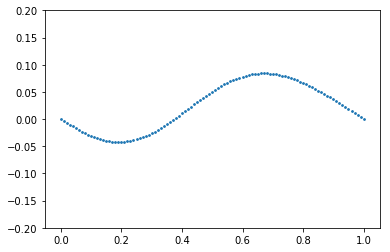

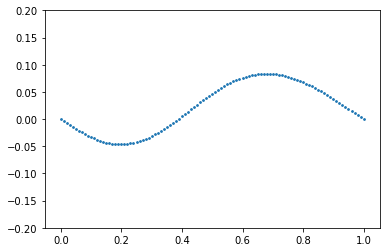

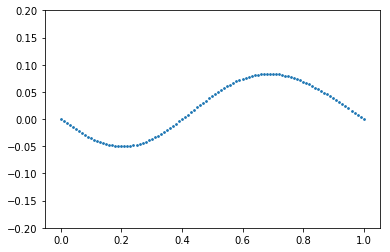

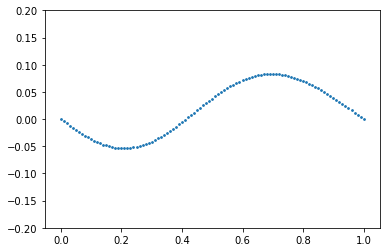

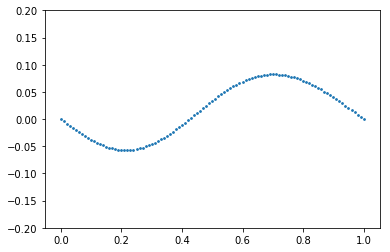

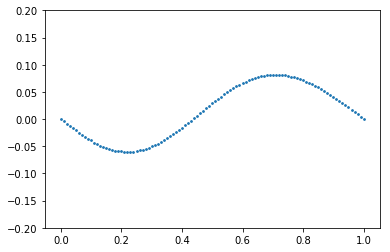

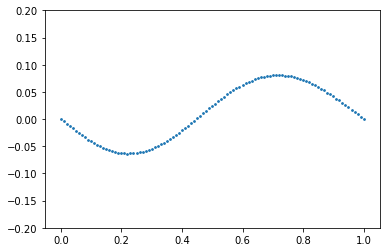

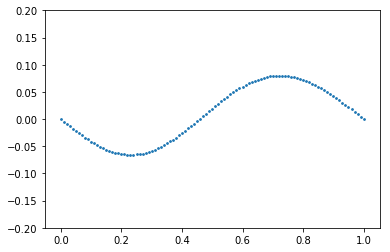

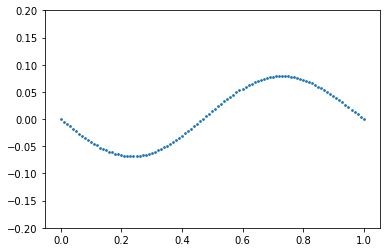

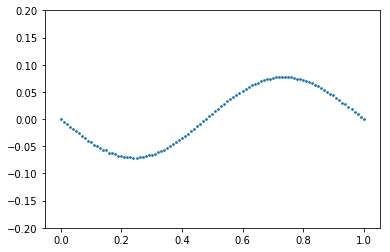

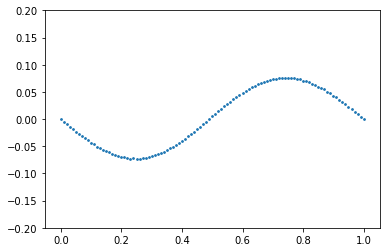

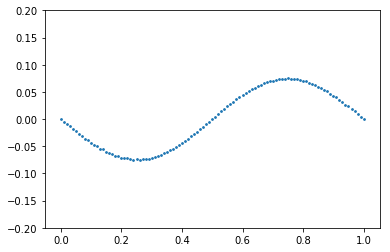

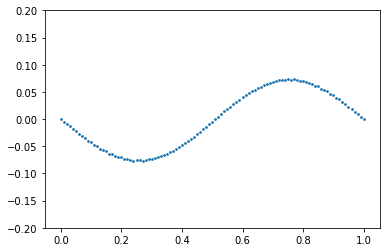

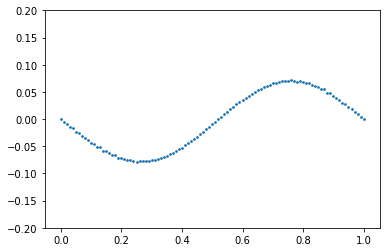

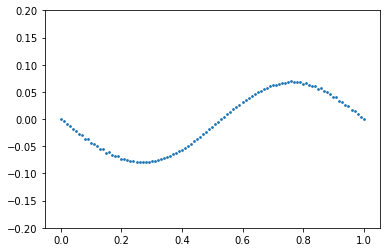

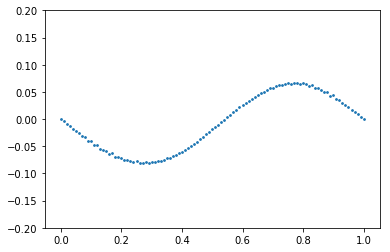

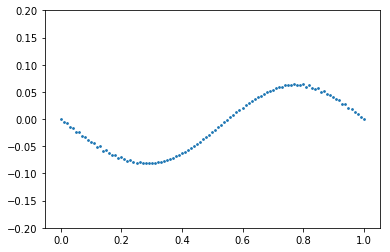

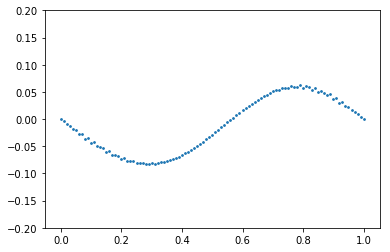

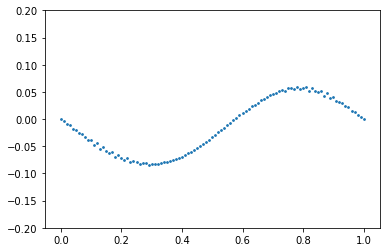

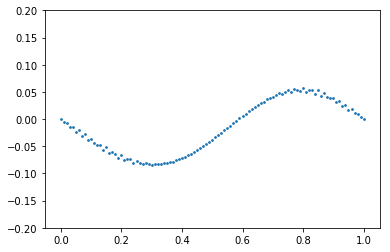

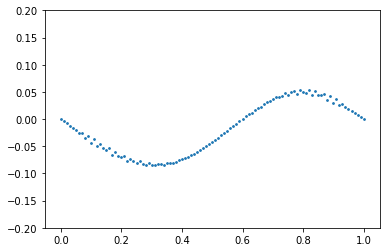

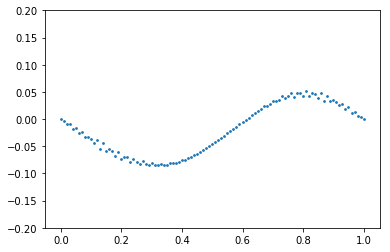

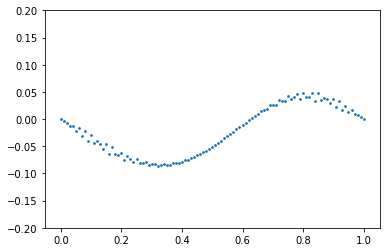

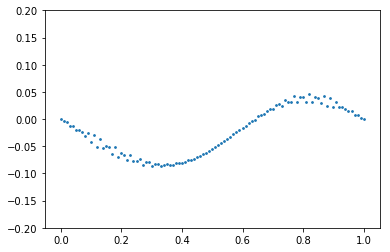

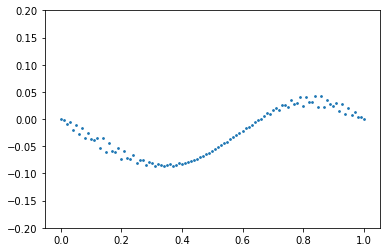

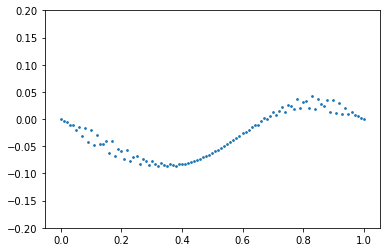

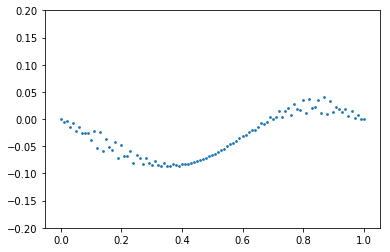

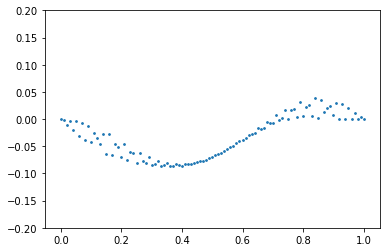

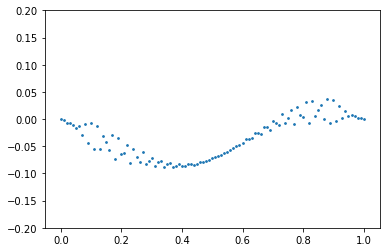

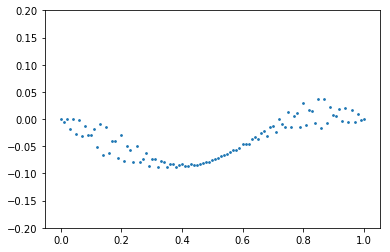

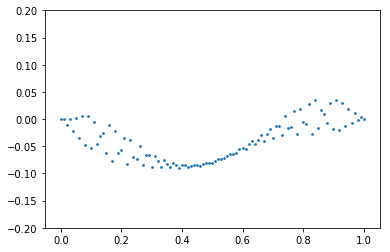

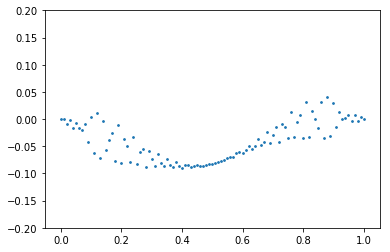

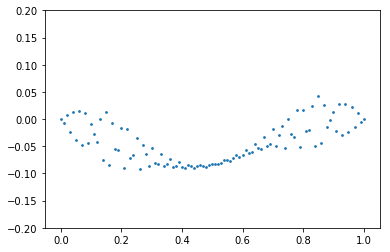

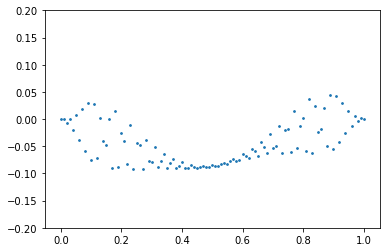

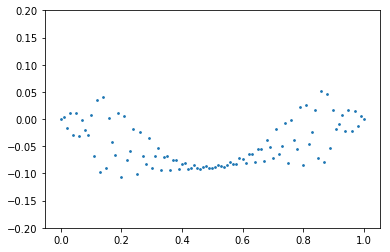

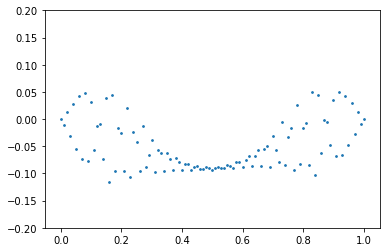

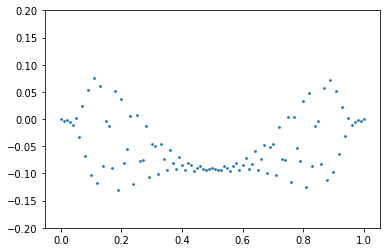

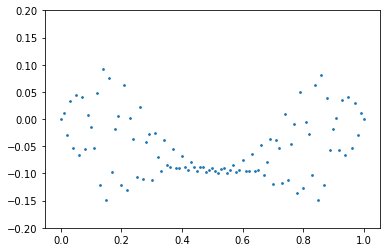

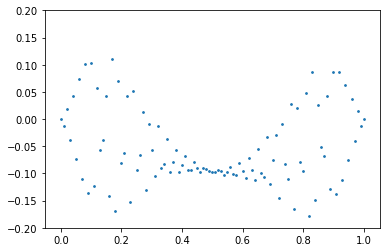

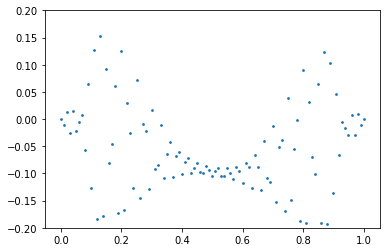

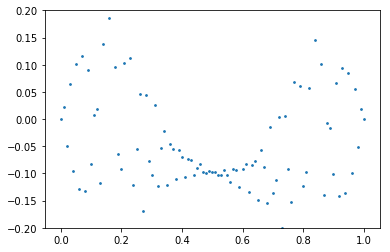

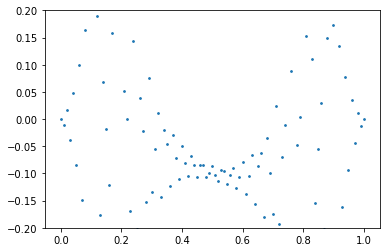

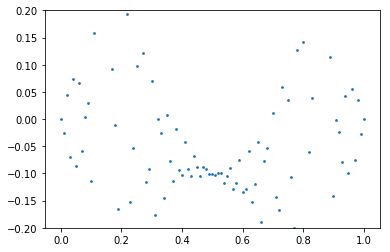

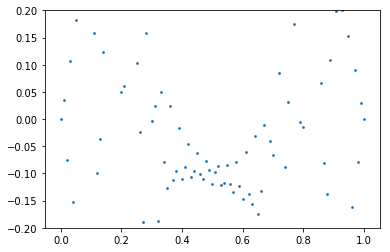

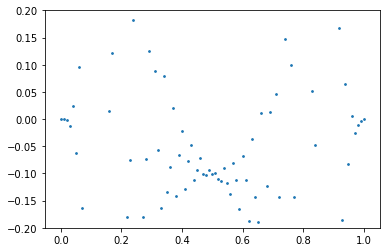

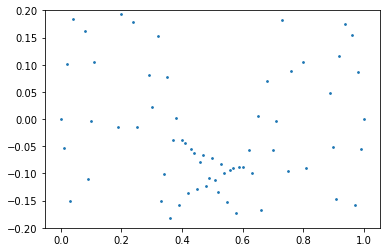

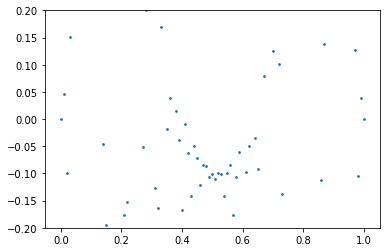

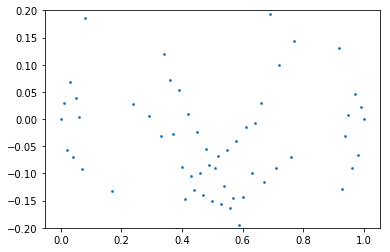

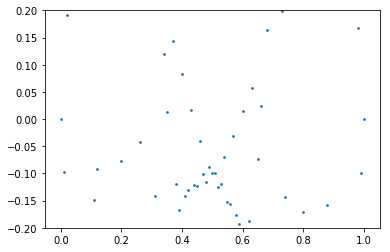

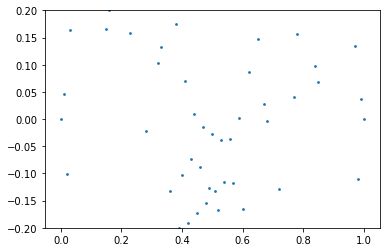

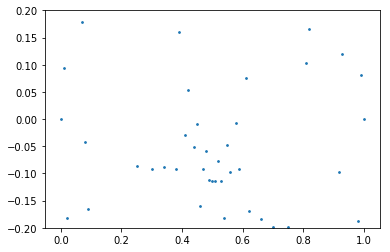

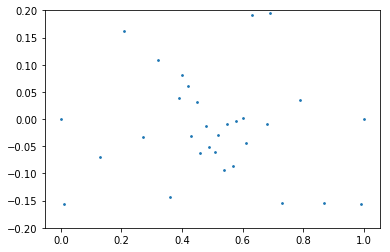

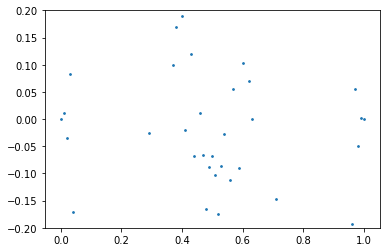

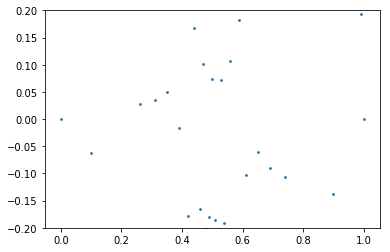

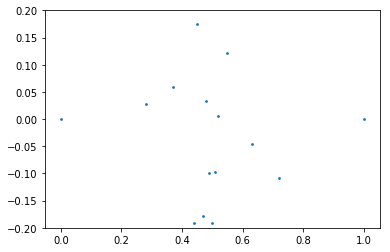

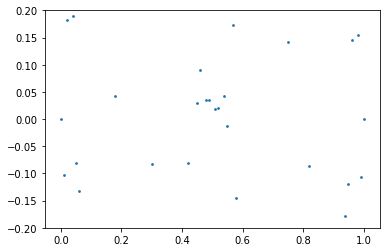

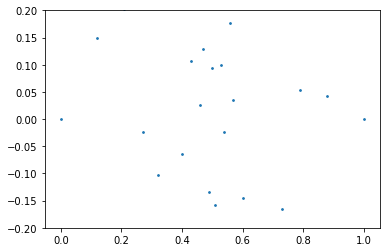

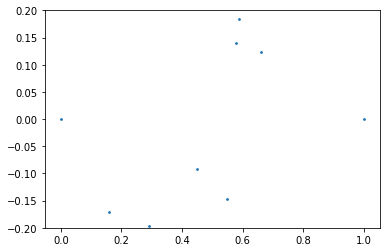

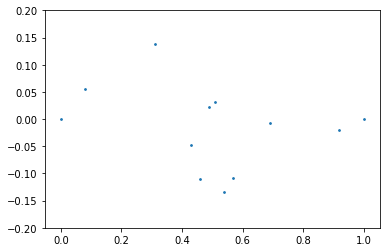

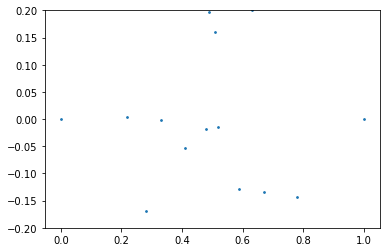

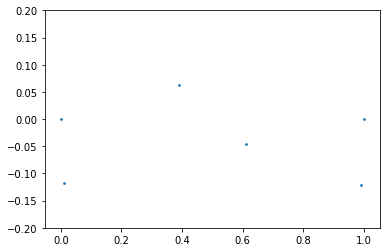

IndexError: index 1000 is out of bounds for axis 0 with size 999

<Figure size 432x288 with 0 Axes>

In [14]:
from pylab import clf, plot, xlim, ylim, show, pause
for i in range(iterations):
	clf() # clear the plot
	plt.scatter(x,velocity[i*10,:],s = 3)
	ylim([-.2, .2]) # set the x boundaries constant
	#xlim([0, 500 ]) # and the y boundaries
	plt.draw()
	pause(0.01)
	#pause to allow a smooth animation
